In [2]:
from dateutil.parser import parse 
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [3]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                 parse_dates=['date'])

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
df.shape

(204, 2)

In [5]:
# alternatively,
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                  parse_dates=['date'], 
                  index_col  ='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

In [6]:
# # dataset source: https://github.com/rouseguy
# df_panel = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
# df_panel = df.loc[df.market=='MUMBAI', :]
# df_panel.head()

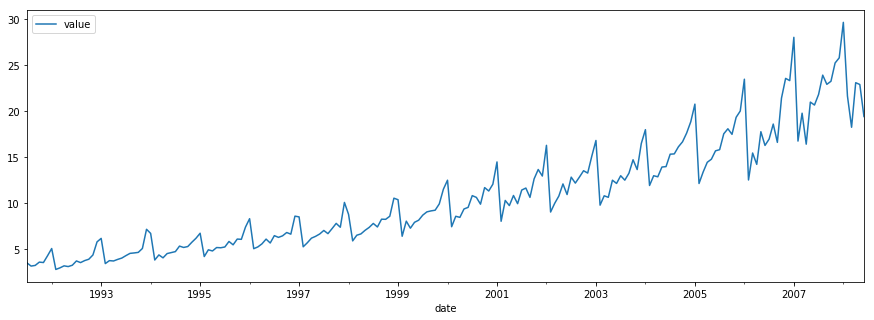

In [7]:
plt.figure(figsize=(16, 6));
ser.plot();

#### # Motor Vehicle Retail Sales: Domestic Autos (DAUTONSA)
Units:  Thousands of Units, Not Seasonally Adjusted

Frequency:  Monthly

Autos are all passenger cars, including station wagons. Domestic sales are all United States (U.S.) sales of vehicles assembled in the U.S., Canada, and Mexico.

Suggested Citation:
U.S. Bureau of Economic Analysis, Motor Vehicle Retail Sales: Domestic Autos [DAUTONSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DAUTONSA, April 1, 2019.


In [8]:

ser_auto = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\DAUTONSA.csv', 
                       parse_dates=['DATE'], 
                       index_col  ='DATE')
ser_auto.head()

,DAUTONSA
DATE,
1967-01-01,564.1
1967-02-01,509.1
1967-03-01,670.4
1967-04-01,710.2
1967-05-01,744.8


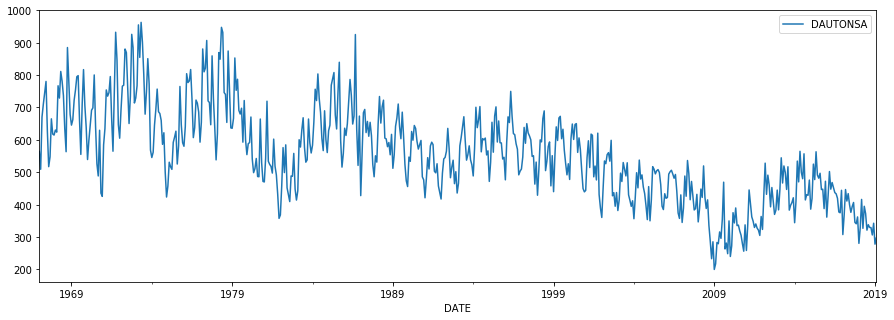

In [9]:
ser_auto.plot()

# Time Series and PANDAS - Basics

- In pandas, a single point in time is represented as a __Timestamp__. 

- We can use the __to_datetime()__ function to create Timestamps from strings in a wide variety of date/time formats. 

- to_datetime() automatically infers a date/time format based on the input. 

- In the example below, 
    - the ambiguous date '7/8/1952' is assumed to be month/day/year and is interpreted as July 8, 1952. 
    - Alternatively, we can use the 'dayfirst' parameter to tell pandas to interpret the date as August 7, 1952.

In [10]:
pd.to_datetime('2018-5-15 3:45pm')

Timestamp('2018-05-15 15:45:00')

In [11]:
pd.to_datetime('7/8/2018')

Timestamp('2018-07-08 00:00:00')

In [12]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

If we supply a list or array of strings as input to to_datetime(), it returns a sequence of date/time values in a DatetimeIndex object, which is the core data structure that powers much of pandas time series functionality.

In [13]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In the DatetimeIndex above, the data type datetime64[ns] indicates that the underlying data is stored as 64-bit integers, in units of nanoseconds (ns).

This data structure allows pandas to compactly store large sequences of date/time values and efficiently perform vectorized operations using NumPy datetime64 arrays.

Date format codes:-
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [14]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

# Creating a time series DataFrame

- The OPSD project - https://open-power-system-data.org/

- Open Power System Data is a free-of-charge data platform dedicated to electricity system researchers. 

- collect, check, process, document, and publish data that are publicly available but currently inconvenient to use. 

- The project is a service provider to the modeling community: a supplier of a public good.

In [21]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\opsd_germany_daily.csv'

In [22]:
opsd_daily = pd.read_csv(location)
opsd_daily.shape

(4383, 5)

In [23]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [24]:
# check out the data types of each column.
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [25]:
format = '%Y-%m-%d'

opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'], format=format)

opsd_daily.set_index('Date', inplace=True)

opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [26]:
# # set Date as the DataFrame’s index.
# opsd_daily.set_index('Date', inplace=True)
# opsd_daily.head(3)

In [27]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4)
memory usage: 171.2 KB


In [28]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [29]:
pd.DatetimeIndex(opsd_daily.index).year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

Another useful aspect of the DatetimeIndex is that the individual date/time components are all available as attributes such as year, month, day, and so on. 

Let’s add a few more columns to opsd_daily, containing the year, month, and weekday name.

In [32]:
pd.DatetimeIndex(opsd_daily.index).week

Int64Index([52,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            51, 51, 51, 52, 52, 52, 52, 52, 52, 52],
           dtype='int64', name='Date', length=4383)

In [31]:
# Add columns with year, month, and weekday name
opsd_daily['Year']  = pd.DatetimeIndex(opsd_daily.index).year
opsd_daily['Month'] = pd.DatetimeIndex(opsd_daily.index).month

opsd_daily['Weekday Name'] = pd.DatetimeIndex(opsd_daily.index).weekday_name

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


#### Time-based indexing

In [33]:
# select data for a single day using a string such as '2017-08-10'.
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [34]:
# select a slice of days, such as '2014-01-20':'2014-01-22'. As with regular label-based indexing with loc, the slice is inclusive of both endpoints.
opsd_daily.loc['2014-01-20':'2014-01-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday
2014-01-23,1631.373,125.177,13.661,138.838,2014,1,Thursday
2014-01-24,1617.411,106.527,9.807,116.334,2014,1,Friday
2014-01-25,1399.124,145.786,19.051,164.837,2014,1,Saturday


#### partial-string indexing

- select all date/times which partially match a given string. 

- For example, 
    - we can select the entire year 2006 with opsd_daily.loc['2006'], 
    - or the entire month of February 2012 with opsd_daily.loc['2012-02'].

In [35]:
# get records of Feb 2012
opsd_daily.loc['2012-02':]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.86600,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.40700,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.63100,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.61400,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.43200,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.76600,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.07800,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.77400,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.53200,132.219,19.042,151.261,2012,2,Thursday


# Visualizing time series data

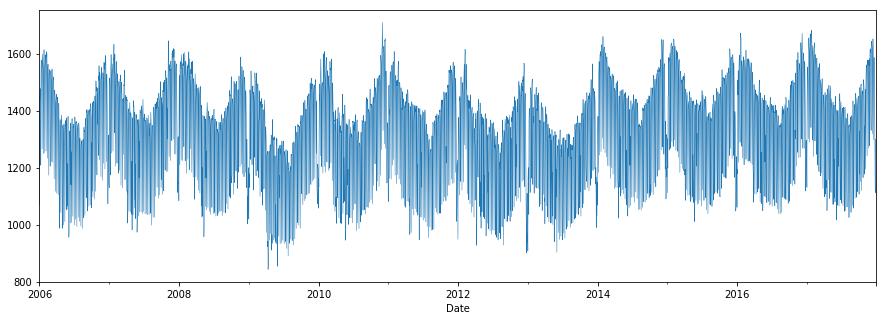

In [36]:
# create a line plot of the full time series of Germany’s daily electricity consumption, 
# using the DataFrame’s plot() method.

opsd_daily['Consumption'].plot(linewidth=0.5);

 with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

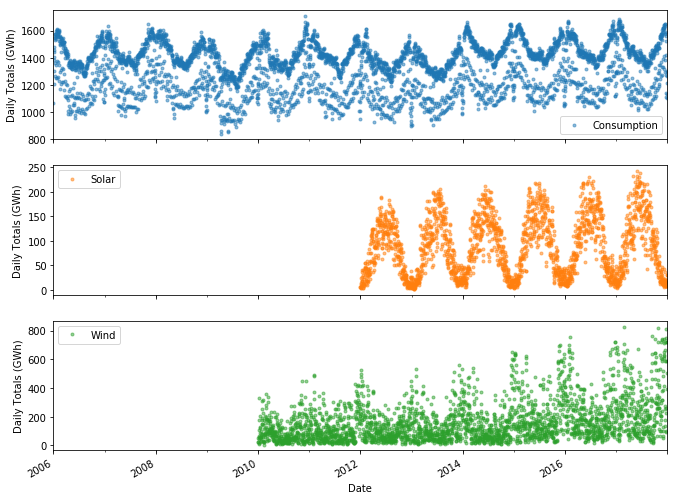

In [37]:
# Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(16, 6)})

cols_plot = ['Consumption', 'Solar', 'Wind']

axes      = opsd_daily[cols_plot].plot(marker='.', 
                                       alpha=0.5, 
                                       linestyle='None', 
                                       figsize=(11, 9), 
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

#### observation

- Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.


- Electricity consumption appears to split into 2 clusters — 
    - one with oscillations centered roughly around 1400 GWh, and 
    - another with fewer and more scattered data points, centered roughly around 1150 GWh. 
        - We might guess that these clusters correspond with weekdays and weekends (needs further analysis)


- Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.

- Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.

- There appears to be a strong increasing __trend__ in wind power production over the years.

- All three time series clearly exhibit periodicity —referred to as __seasonality__ in time series analysis — in which a pattern repeats again and again at regular time intervals. 

- The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. 

#### The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. 

Let’s plot the time series in a single year to investigate further.

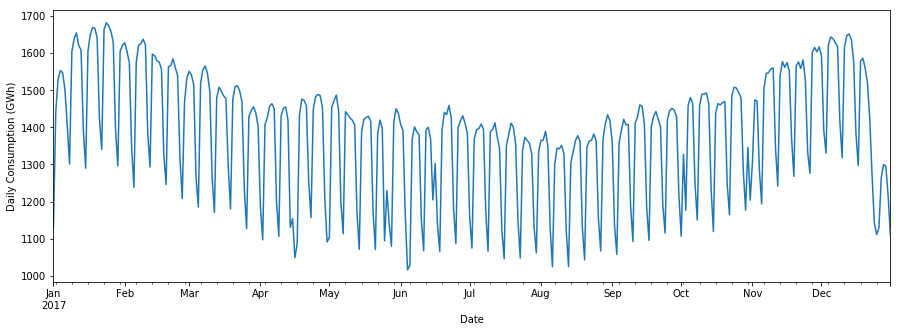

In [38]:
ax = opsd_daily.loc['2017':, 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

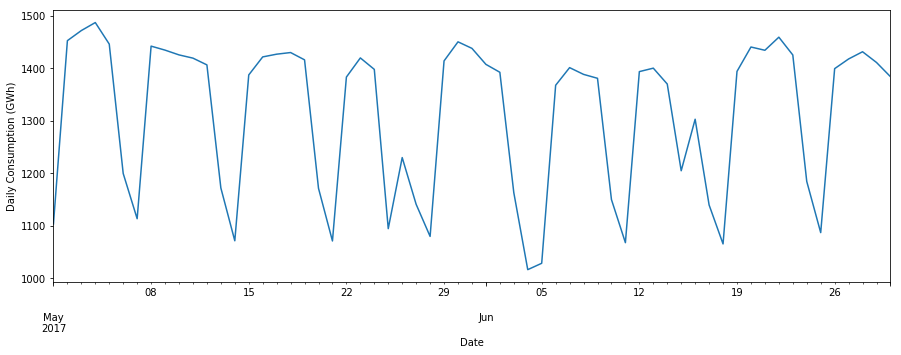

In [39]:
# for just 1 month
ax = opsd_daily.loc['2017-05-01':'2017-06-30', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

- we can clearly see the weekly oscillations. 

#### Another observation

Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

 zoom in further and look at just January and February.

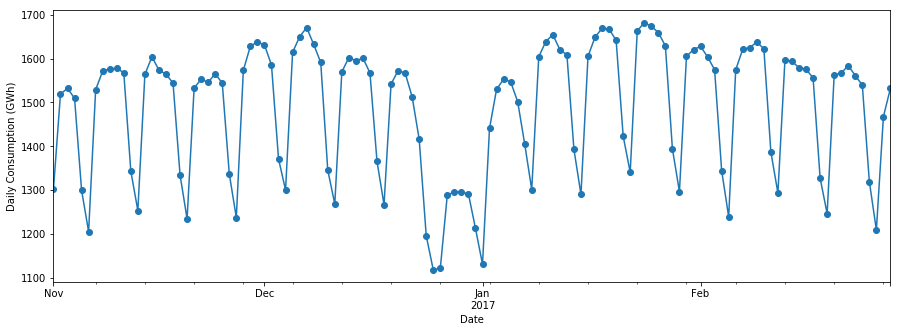

In [40]:
ax = opsd_daily.loc['2016-11-01':'2017-02-28', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

# Customizing time series plots

To better visualize the weekly seasonality in electricity consumption in the plot above, it would be nice to have vertical gridlines on a weekly time scale (instead of on the first day of each month). 

We can customize our plot with matplotlib.dates, so let’s import that module.

In [41]:
import matplotlib.dates as mdates

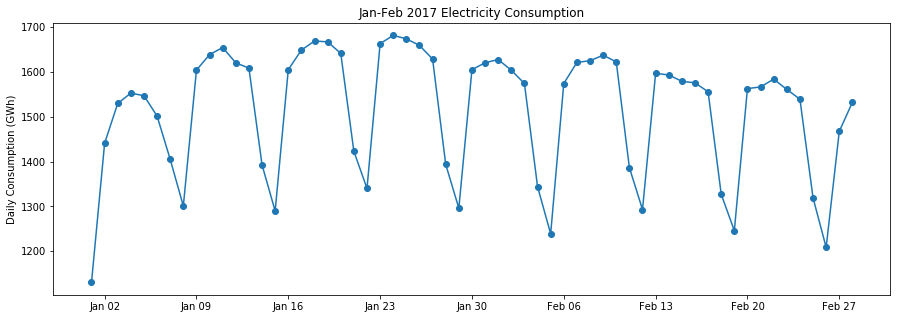

In [42]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc['2017-01-01':'2017-02-28', 'Consumption'], marker='o', linestyle='-')

ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Seasonality

Explore the seasonality of data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. 

We’ll first group the data by month, to visualize yearly seasonality.

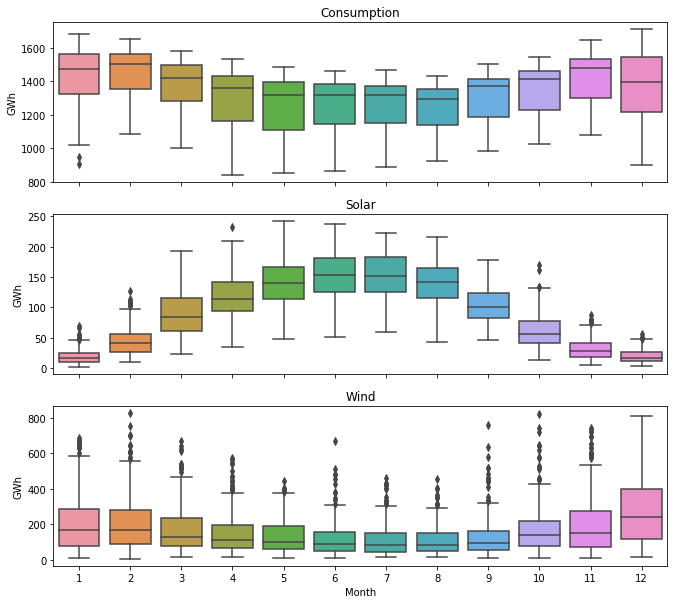

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    
    ax.set_ylabel('GWh')
    ax.set_title(name)

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:

- Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. 

- We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.

- While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

#### group the electricity consumption time series by day of the week, to explore weekly seasonality.

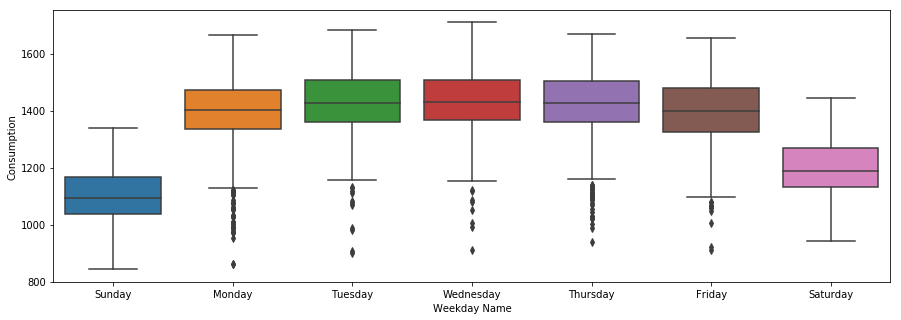

In [36]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

# Frequencies

When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. 

For example, let’s use the date_range() function to create a sequence of uniformly spaced dates from 1998-03-10 through 1998-03-15 at daily frequency.

In [44]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

The resulting DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. 

    - Available frequencies in pandas include 
        - hourly ('H'), 
        - calendar daily ('D'), 
        - business daily ('B'), 
        - weekly ('W'), 
        - monthly ('M'), 
        - quarterly ('Q'), 
        - annual ('A'), and many others. 
        
    - Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.

let’s create a date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.

In [45]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [46]:
# our main data index ...
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

We can see that it has no frequency (freq=None). This makes sense, since the index was created from a sequence of dates in our CSV file, without explicitly specifying any frequency for the time series.

If we know that our data should be at a specific frequency, we can use the DataFrame’s asfreq() method to assign a frequency. 

    - If any date/times are missing in the data, 
        - new rows will be added for those date/times, which are either empty (NaN), 
        - or filled according to a specified data filling method such as forward filling or interpolation.

In [285]:
# create a new DataFrame which contains only the Consumption data for Feb 3, 6, and 8, 2013.

In [48]:
opsd_daily.index.min(), opsd_daily.index.max(), 

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [49]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
#times_sample = ['2013-02-03', '2013-02-06', '2013-02-08']

# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Now we use the asfreq() method to convert the DataFrame to daily frequency, with a column for unfilled data, and a column for forward filled data.


.... WIP (frequency example)

# Resampling

- It is often useful to resample our time series data to a lower or higher frequency. 

- Resampling to a lower frequency (__downsampling__) usually involves an aggregation operation

    - for example, computing monthly sales totals from daily data. 
    - The daily OPSD data we’re working with in this example was downsampled from the original hourly time series. 
    - Resampling to a higher frequency (__upsampling__) is less common and often involves interpolation or other data filling method 
    
        — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.
        
> __Downsampling__, explore how it can help us analyze the OPSD data on various time scales.

    - We can use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. 

    - The resample() method returns a Resampler object, similar to a pandas GroupBy object. 
    - We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.
    
** resample the data to a weekly mean time series. **

In [52]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-29,1419.077067,485.735571,44.344857,530.080429
2017-11-05,1326.164499,300.840286,49.796857,350.637143
2017-11-12,1472.113604,273.502143,21.129000,294.631143
2017-11-19,1491.885550,329.920000,28.595143,358.515143
2017-11-26,1488.566089,452.703286,25.847857,478.551143
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571


- The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. 

- The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on. 

- By default, each row of the downsampled time series is labelled with the left edge of the time bin.

By construction, our weekly time series has 1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two DataFrames.

In [59]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


plot the daily and weekly Solar time series together over a single six-month period to compare them.

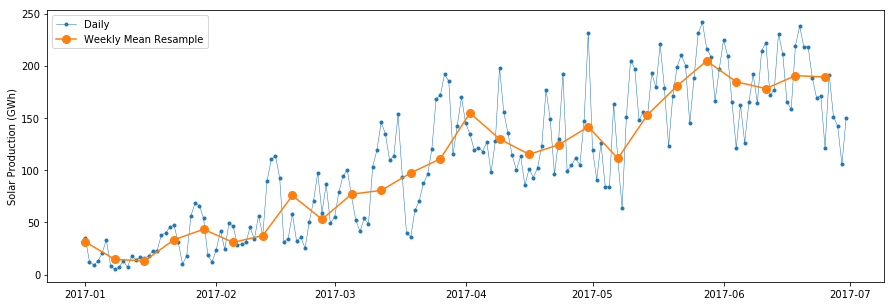

In [53]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

Now let’s resample the data to __monthly frequency__, aggregating with sum totals instead of the mean. 
> Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. We use the min_count parameter to change this behavior.

In [54]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum()
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


# Rolling windows

- Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. 

- However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are:

    2006-01-01 to 2006-01-07 — labelled as 2006-01-04
    2006-01-02 to 2006-01-08 — labelled as 2006-01-05
    2006-01-03 to 2006-01-09 — labelled as 2006-01-06

In [55]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


We can see that the first non-missing rolling mean value is on 2006-01-04, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

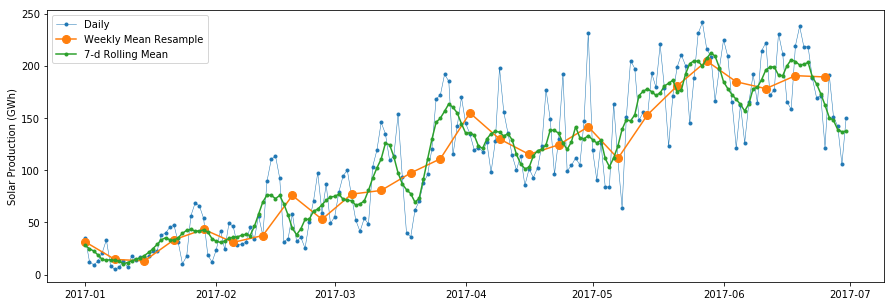

In [56]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

- We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. 

- In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. 
    - In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.

# Trends

- Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. 

- An easy way to visualize these trends is with rolling means at different time scales.

In [62]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series

opsd_365d = opsd_daily[data_columns].rolling(window=30, center=True, min_periods=30).mean()

Let’s plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

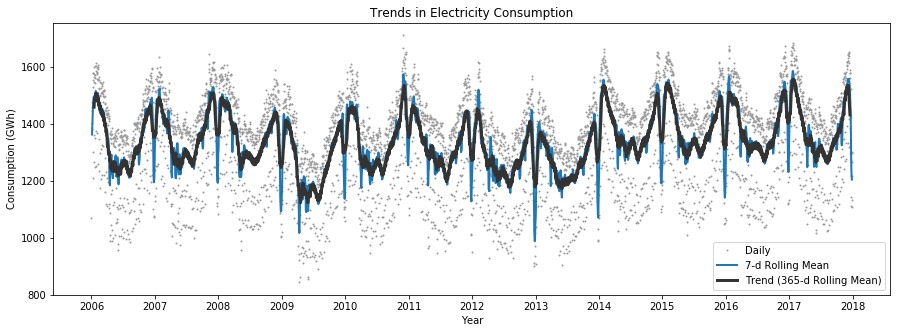

In [63]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

- We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. 

- The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

- Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

Now let’s look at trends in wind and solar production.

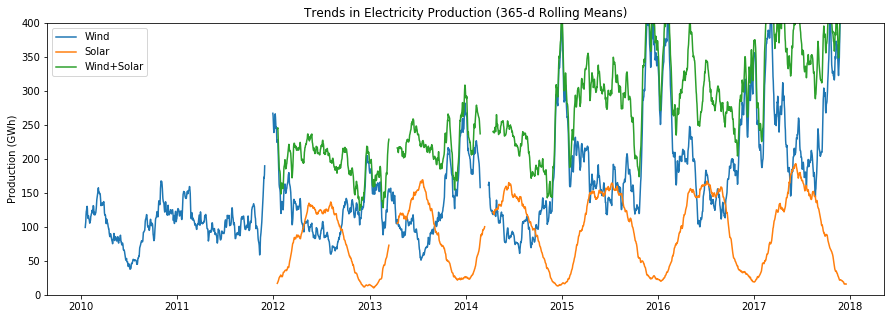

In [64]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

We can see 
- a small increasing trend in solar power production and 
- a large increasing trend in wind power production, 

> as Germany continues to expand its capacity in those sectors.